In [1]:
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem, ppf
import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_conjunto = pd.read_csv("../../files/df_conjunto.csv")

In [3]:
df_conjunto.head()

,Unnamed: 0,loyalty_number,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,0,480934,Ontario,Toronto,M2Z 4K1,F,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2017,1,0,0,0,0,0.0,0,0
1,1,480934,Ontario,Toronto,M2Z 4K1,F,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2017,2,3,0,3,2823,282.0,0,0
2,2,480934,Ontario,Toronto,M2Z 4K1,F,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2017,3,0,0,0,0,0.0,0,0
3,3,480934,Ontario,Toronto,M2Z 4K1,F,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2017,4,0,0,0,0,0.0,0,0
4,4,480934,Ontario,Toronto,M2Z 4K1,F,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,2018,2018,10,6,2,8,3352,335.0,465,38


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [4]:
vuelos_mes = df_conjunto.groupby(['year', 'month'])['flights_booked'].sum().reset_index()


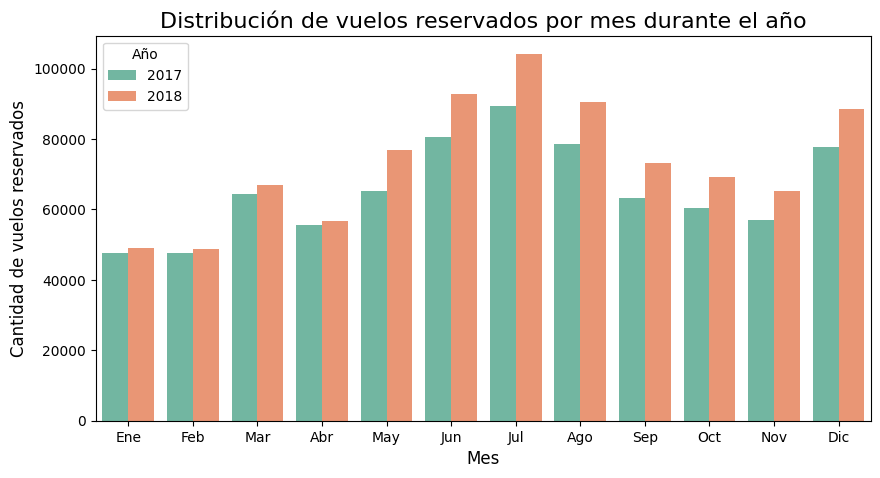

In [13]:
plt.figure(figsize=(10, 5))  # Tamaño de la figura (ajustable)
sns.barplot(data=vuelos_mes, x='month', y='flights_booked', hue='year', palette= "Set2") #Usamos el hue para diferenciar los años
# Personalización del gráfico
plt.title('Distribución de vuelos reservados por mes durante el año', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de vuelos reservados', fontsize=12)
plt.xticks(ticks=range(12), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(title='Año', loc='upper left');

El gráfico nos permite ver la subida en los meses de verano, con los mayores valores en el mes de julio y una subida puntual el mes de diciembre. También podemos observar que los mayores valores son en el año 2018.